In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
df = pd.read_csv(r'C:\Users\berna\sentiment_analysis\br_market\data\final\brazilian_stocks_with_sentiment_and_historical_data_2024-10-02.csv')

In [3]:
def safe_numeric(val):
    try:
        return pd.to_numeric(val)
    except ValueError:
        return pd.np.nan

In [4]:
major_companies = ['ABEV', 'AZUL', 'BBD', 'BSBR', 'EBR', 'ERJ', 'GGB', 'ITUB', 'PBR', 'SBS', 'SID', 'SUZ', 'UGP', 'VALE', 'XP']
avg_sentiments = []
company_stats = {}

In [5]:
for company in major_companies:
    print(f"Processing {company}...")
    company_data = df[df['Ticker'] == company].copy()  # Create an explicit copy
    if not company_data.empty:
        print(f"  Found {len(company_data)} entries for {company}")
        
        # Safely convert sentiment scores to numeric
        for col in ['Positive_Score', 'Negative_Score', 'Neutral_Score']:
            company_data.loc[:, col] = company_data[col].apply(safe_numeric)
            print(f"  Converted {col} to numeric. Sample value: {company_data[col].iloc[0]}")
        
        avg_sentiment = company_data[['Positive_Score', 'Negative_Score', 'Neutral_Score']].mean()
        print(f"  Average sentiment: {avg_sentiment}")
        avg_sentiments.append(avg_sentiment)
        
        # Calculate additional statistics
        date_range = (company_data['Date'].min(), company_data['Date'].max())
        avg_7d_return = safe_numeric(company_data['7d_Return'].mean())
        sentiment_distribution = company_data['Overall_Sentiment'].value_counts(normalize=True).to_dict()
        
        company_stats[company] = {
            'count': len(company_data),
            'date_range': date_range,
            'avg_7d_return': avg_7d_return,
            'sentiment_distribution': sentiment_distribution
        }
        print(f"  Calculated statistics for {company}")
    else:
        print(f"No data found for {company}")
        

Processing ABEV...
  Found 58 entries for ABEV
  Converted Positive_Score to numeric. Sample value: 0.1388382166624069
  Converted Negative_Score to numeric. Sample value: 0.0094197634607553
  Converted Neutral_Score to numeric. Sample value: 0.8517420291900635
  Average sentiment: Positive_Score    0.225649
Negative_Score    0.088591
Neutral_Score     0.685759
dtype: float64
  Calculated statistics for ABEV
Processing AZUL...
  Found 69 entries for AZUL
  Converted Positive_Score to numeric. Sample value: 0.0082741733640432
  Converted Negative_Score to numeric. Sample value: 0.9653260111808776
  Converted Neutral_Score to numeric. Sample value: 0.0263997428119182
  Average sentiment: Positive_Score    0.397157
Negative_Score    0.143087
Neutral_Score     0.459756
dtype: float64
  Calculated statistics for AZUL
Processing BBD...
  Found 68 entries for BBD
  Converted Positive_Score to numeric. Sample value: 0.1751741170883178
  Converted Negative_Score to numeric. Sample value: 0.8022

In [6]:
print(f"Number of companies processed: {len(company_stats)}")
print("Companies with data:", list(company_stats.keys()))

Number of companies processed: 15
Companies with data: ['ABEV', 'AZUL', 'BBD', 'BSBR', 'EBR', 'ERJ', 'GGB', 'ITUB', 'PBR', 'SBS', 'SID', 'SUZ', 'UGP', 'VALE', 'XP']


In [7]:
avg_df = pd.DataFrame(avg_sentiments, index=major_companies, columns=['Positive_Score', 'Negative_Score', 'Neutral_Score'])
print("\nAverage Sentiment Scores:")
print(avg_df)



Average Sentiment Scores:
      Positive_Score  Negative_Score  Neutral_Score
ABEV        0.225649        0.088591       0.685759
AZUL        0.397157        0.143087       0.459756
BBD         0.176593        0.174503       0.648904
BSBR        0.221960        0.265591       0.512449
EBR         0.202485        0.205930       0.591585
ERJ         0.509995        0.069315       0.420690
GGB         0.176616        0.178120       0.645264
ITUB        0.112697        0.056456       0.830847
PBR         0.431347        0.151154       0.417499
SBS         0.183367        0.045124       0.771509
SID         0.209190        0.234644       0.556166
SUZ         0.271741        0.174727       0.553532
UGP         0.168054        0.106902       0.725044
VALE        0.293223        0.116201       0.590576
XP          0.248678        0.262494       0.488828


In [8]:
# Print additional statistics
print("\nAdditional Statistics:")
for company, stats in company_stats.items():
    print(f"\n{company}:")
    print(f"  Total entries: {stats['count']}")
    print(f"  Date range: from {stats['date_range'][0]} to {stats['date_range'][1]}")
    print(f"  Average 7-day Return: {stats['avg_7d_return']:.4f}%")
    print("  Sentiment Distribution:")
    for sentiment, percentage in stats['sentiment_distribution'].items():
        print(f"    {sentiment}: {percentage:.2%}")


Additional Statistics:

ABEV:
  Total entries: 58
  Date range: from 2023-03-29 to 2024-09-03
  Average 7-day Return: 0.0034%
  Sentiment Distribution:
    Neutral: 75.86%
    Positive: 17.24%
    Negative: 6.90%

AZUL:
  Total entries: 69
  Date range: from 2023-05-18 to 2024-08-29
  Average 7-day Return: 2.1726%
  Sentiment Distribution:
    Neutral: 47.83%
    Positive: 39.13%
    Negative: 13.04%

BBD:
  Total entries: 68
  Date range: from 2021-11-10 to 2024-08-29
  Average 7-day Return: 0.1273%
  Sentiment Distribution:
    Neutral: 69.12%
    Negative: 17.65%
    Positive: 13.24%

BSBR:
  Total entries: 51
  Date range: from 2022-05-11 to 2024-05-09
  Average 7-day Return: 1.0227%
  Sentiment Distribution:
    Neutral: 52.94%
    Negative: 27.45%
    Positive: 19.61%

EBR:
  Total entries: 72
  Date range: from 2020-11-12 to 2024-08-16
  Average 7-day Return: 1.9051%
  Sentiment Distribution:
    Neutral: 68.06%
    Negative: 18.06%
    Positive: 13.89%

ERJ:
  Total entries: 4

In [9]:
company_names = {
    'ABEV': 'Ambev',
    'AZUL': 'Azul',
    'BBD': 'Banco Bradesco',
    'BSBR': 'Banco Santander Brasil',
    'EBR': 'Eletrobras',
    'ERJ': 'Embraer',
    'GGB': 'Gerdau',
    'ITUB': 'Itaú',
    'PBR': 'Petrobras',
    'SBS': 'SABESP',
    'SID': 'Companhia Siderúrgica Nacional',
    'SUZ': 'Suzano',
    'UGP': 'Ultrapar',
    'VALE': 'Vale',
    'XP': 'XP'
}

In [10]:
# Function to create labels with both ticker and company name
def create_label(ticker):
    return f"{ticker}: {company_names.get(ticker, ticker)}"

In [11]:
avg_df.index = [create_label(ticker) for ticker in avg_df.index]


In [12]:
# Set the style for all plots
avg_df_sorted = avg_df.sort_values('Positive_Score', ascending=False)
# Set up the plot with a larger figure size
plt.figure(figsize=(20, 10))
sns.set_style("whitegrid")
sns.set_palette("colorblind")


<Figure size 2000x1000 with 0 Axes>

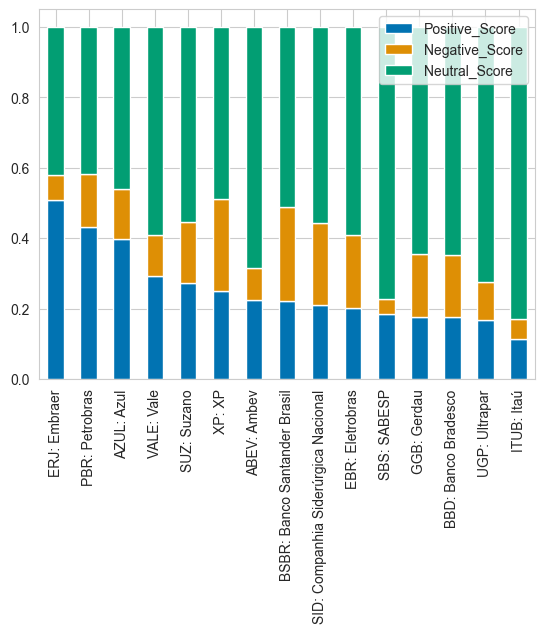

In [13]:
ax = avg_df_sorted.plot(kind='bar', stacked=True)


In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(avg_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap of Sentiment Scores for Major Brazilian Companies', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('sentiment_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

In [17]:
returns = [company_stats[ticker.split(':')[0]]['avg_7d_return'] for ticker in avg_df.index]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(avg_df['Positive_Score'], returns, color='blue', alpha=0.5)
for i, company in enumerate(avg_df.index):
    plt.annotate(company, (avg_df['Positive_Score'][i], returns[i]), fontsize=8, 
                 xytext=(5, 5), textcoords='offset points')
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_df['Positive_Score'], returns)
line = slope * avg_df['Positive_Score'] + intercept
plt.plot(avg_df['Positive_Score'], line, color='orange', linestyle='-', marker='.', markersize=1)
plt.xlabel('Positive Sentiment Score', fontsize=12)
plt.ylabel('Average 7-day Return (%)', fontsize=12)
plt.title('Positive Sentiment vs 7-day Return', fontsize=16)
plt.tight_layout()
plt.savefig('sentiment_vs_return_scatter_positive_with_trendline.png', dpi=300, bbox_inches='tight')
plt.close()

C:\Users\berna\AppData\Local\Temp\ipykernel_5372\1360223536.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(company, (avg_df['Positive_Score'][i], returns[i]), fontsize=8,


In [18]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(avg_df['Negative_Score'], returns, color='blue', alpha=0.5)
for i, company in enumerate(avg_df.index):
    plt.annotate(company, (avg_df['Negative_Score'][i], returns[i]), fontsize=8, 
                 xytext=(5, 5), textcoords='offset points')
slope, intercept, r_value, p_value, std_err = stats.linregress(avg_df['Negative_Score'], returns)
line = slope * avg_df['Negative_Score'] + intercept
plt.plot(avg_df['Negative_Score'], line, color='orange', linestyle='-', marker='.', markersize=1)
plt.xlabel('Negative Sentiment Score', fontsize=12)
plt.ylabel('Average 7-day Return (%)', fontsize=12)
plt.title('Negative Sentiment vs 7-day Return', fontsize=16)
plt.tight_layout()
plt.savefig('n_sentiment_vs_return_scatter_positive_with_trendline.png', dpi=300, bbox_inches='tight')
plt.close()

C:\Users\berna\AppData\Local\Temp\ipykernel_5372\1765275900.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(company, (avg_df['Negative_Score'][i], returns[i]), fontsize=8,


In [19]:
sentiment_data = pd.DataFrame({
    'Company': np.repeat(avg_df.index, 3),
    'Sentiment Type': np.tile(['Positive', 'Neutral', 'Negative'], len(avg_df)),
    'Score': avg_df.values.flatten()
})
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sentiment Type', y='Score', data=sentiment_data)
plt.title('Distribution of Sentiment Scores Across Companies', fontsize=16)
plt.xlabel('Sentiment Type', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.tight_layout()
plt.savefig('sentiment_distribution_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()

In [26]:
top_5_companies = avg_df.nlargest(5, 'Positive_Score').index
top_5_data = avg_df.loc[top_5_companies]

angles = np.linspace(0, 2*np.pi, len(top_5_data.columns), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
for company in top_5_companies:
    values = top_5_data.loc[company].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=company)
    ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, top_5_data.columns)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Top 5 Companies by Positive Sentiment', fontsize=16)
plt.tight_layout()
plt.savefig('top_5_companies_radar_positive.png', dpi=300, bbox_inches='tight')
plt.close()


In [20]:
top_5_companies = avg_df.nlargest(3, 'Negative_Score').index
top_5_data = avg_df.loc[top_5_companies]

angles = np.linspace(0, 2*np.pi, len(top_5_data.columns), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(projection='polar'))
for company in top_5_companies:
    values = top_5_data.loc[company].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, 'o-', linewidth=2, label=company)
    ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, top_5_data.columns)
ax.set_ylim(0, 1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Top 5 Companies by Negative Sentiment', fontsize=16)
plt.tight_layout()
plt.savefig('top_5_companies_radar_negative.png', dpi=300, bbox_inches='tight')
plt.close()
